## EDA
- The goal of this notebook is to gain a better understanding of the data by inspecting it visually in order to see how our data is structures, and to gain insight 

In [1]:
import pandas as pd
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import seaborn as sns

- This function is an exact copy of a function created in the first notebook, with the end result being a properly formated data frame

In [2]:
def formatting(path):
    #Step 1
    df_raw = pd.read_csv(path, header=None, names=['user_id', 'rating', 'date'], usecols=[0, 1, 2])
    #Step 2
    tmp_movies = df_raw[df_raw['rating'].isna()]['user_id'].reset_index()
    movie_indices = [[index, int(movie[:-1])] for index, movie in tmp_movies.values]
    #Step 3
    shifted_movie_indices = deque(movie_indices)
    shifted_movie_indices.rotate(-1)
    #Step 4
    user_data = []
    for [df_id_1, movie_id], [df_id_2, next_movie_id] in zip(movie_indices, shifted_movie_indices):
        if df_id_1<df_id_2:
            tmp_df = df_raw.loc[df_id_1+1:df_id_2-1].copy()
        else:
            tmp_df = df_raw.loc[df_id_1+1:].copy()
        tmp_df['movie'] = movie_id
        user_data.append(tmp_df)
    #Step 5
    df = pd.concat(user_data)
    print('done formatting')
    return df

In [3]:
df1 = formatting('../Data/combined_data_1.txt')
df2 = formatting('../Data/combined_data_2.txt')
df3 = formatting('../Data/combined_data_3.txt')
df4 = formatting('../Data/combined_data_4.txt')

done formatting
done formatting
done formatting
done formatting


- This cell combines all of the data frames into a single data frame in order to be analyzed. After concatenating all of the individual data frames together, they are deleted in order to preserve RAM

In [4]:
all_users = pd.concat([df1,df2,df3,df4])
del df1
del df2
del df3
del df4

- This cell converts the columns that are the wrong type into the right type.

In [6]:
all_users['user_id'] = pd.to_numeric(all_users['user_id'])
all_users['date'] = pd.to_datetime(all_users['date'])

In [7]:
print("There are",all_users.shape[0],"Recorded reviews")

There are 100480507 Recorded reviews


- This plot shows us the amount of time each score shows up in our data. Based on the plot, we can see that most of the reviews are greater than 3, with 4 being the most common.

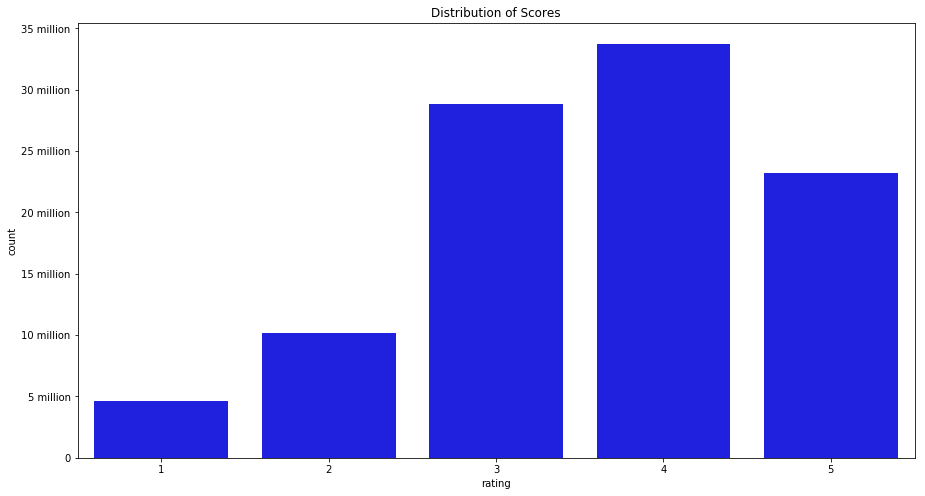

In [8]:
f, ax = plt.subplots(figsize = (15,8))
sns.countplot(all_users['rating'],ax = ax,color='blue')
ax.set_xticklabels([1,2,3,4,5])
ax.set_yticklabels([0,"5 million",'10 million','15 million','20 million','25 million','30 million','35 million'])
ax.set_title("Distribution of Scores")
plt.savefig('../Images/Ratings.png')

- Because our distribution of the user data is very large, this cell creates a list of distributions for the reviews, but limits it to 500. This is done to show the data on a realistic and interpretable scale.

In [29]:
values = all_users.groupby('user_id')['rating'].count().clip(upper=700)

In [30]:
print('There are',len(values),'unique users in this dataset')

There are 480189 unique users in this dataset


- This plot shows us the distribution of the number of reviews for each user. We can see that as number of reviews increases, the amount of users who have that many users decreases. this plot is capped at 700 in order to ensure that this plot remains interpretable

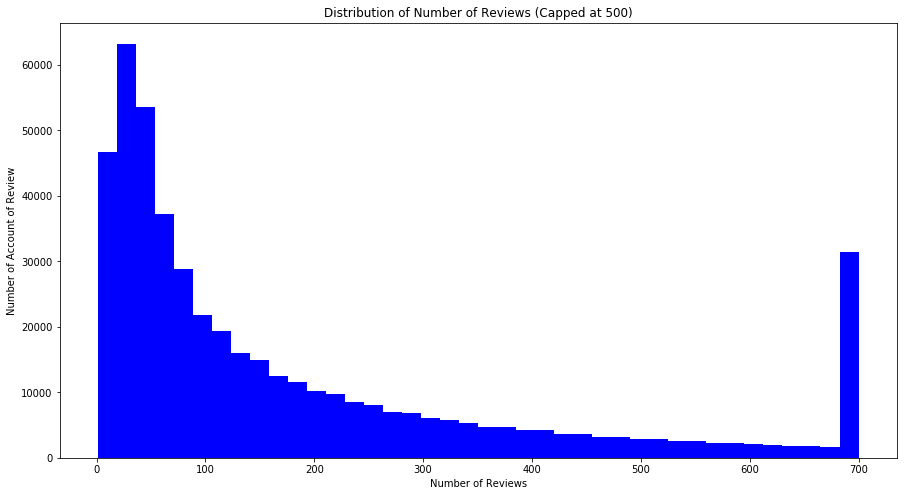

In [31]:
f, ax = plt.subplots(figsize = (15,8))
ax.hist(values,bins=40,color='blue')
ax.set_xlabel("Number of Reviews")
ax.set_ylabel('Number of Account of Review')
ax.set_title('Distribution of Number of Reviews (Capped at 700)')
plt.savefig('../Images/num_of_user_reviews.png')

- The same process that was done for individual users is done here for the number of reviews for each movie, except that in this case, it is capped at 20,000

In [12]:
movie_values = all_users.groupby('movie')['rating'].count().clip(upper=20000)

In [28]:
print('There are',len(movie_values),'unique users in this dataset')

There are 17770 unique users in this dataset


- There is a similar distribution for the number of reviews per movie as there is for the number of reviews per user, except on a different scale. As the number of reviews increase, the amount of movies that have that many reviews decreases

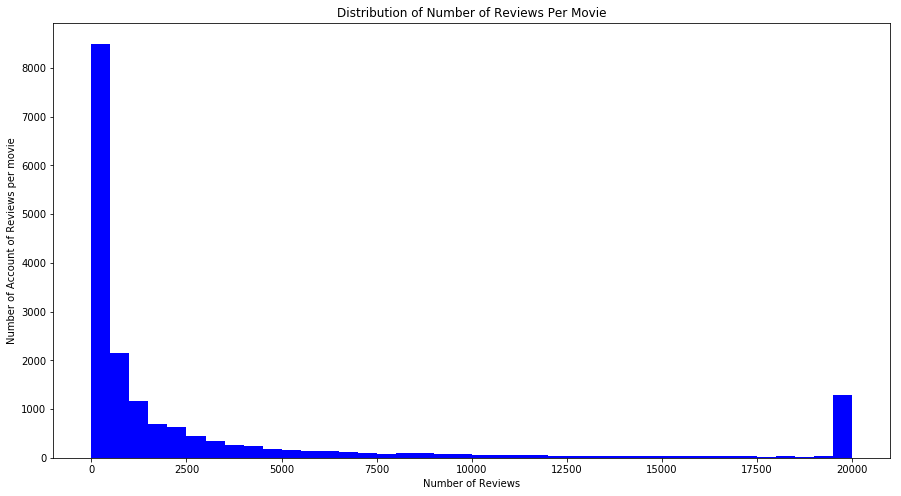

In [18]:
f, ax = plt.subplots(figsize = (15,8))
ax.hist(movie_values,bins=40,color='blue')
ax.set_xlabel("Number of Reviews")
ax.set_ylabel('Number of Account of Reviews per movie')
ax.set_title('Distribution of Number of Reviews Per Movie')
plt.savefig('../Images/num_of_movie_reviews.png')

In [14]:
dates = all_users.groupby('date')['rating'].count()

- This final plot shows the amount of reviews over time. It appears as time increases, the number of reviews increases up until the end of 2005, where the number of reviews seems to be decreasing. There also appears to be some irregularities, with a large spike of reviews in the 2nd quarter of 2005, and the first quarter of 2003

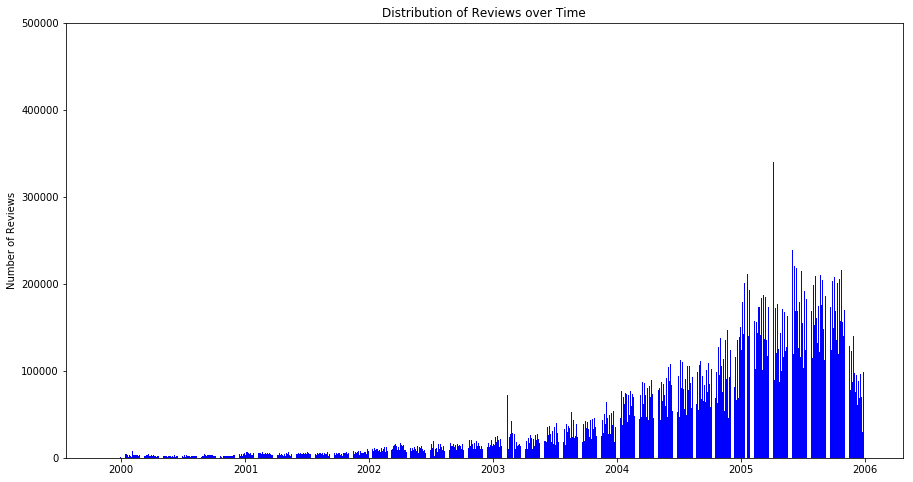

In [32]:
f, ax = plt.subplots(figsize = (15,8))
ax.bar(dates.index,dates.values,color='blue')
ax.set_ylabel('Number of Reviews')
ax.set_ylim(top = 500000)
ax.set_title("Distribution of Reviews over Time")
plt.savefig('../Images/time.png')